### Yolov5 mode download

In [ ]:
!nvidia-smi

Wed Apr  6 10:29:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt 

Cloning into 'yolov5'...
remote: Enumerating objects: 12566, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 12566 (delta 2), reused 1 (delta 0), pack-reused 12545
Receiving objects: 100% (12566/12566), 11.63 MiB | 11.48 MiB/s, done.
Resolving deltas: 100% (8740/8740), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.3 MB/s 


### train,val,test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/종프_train2/train.txt",header=None,names=['image_name'])
df.head()

,image_name
0,안성현(0)
1,안성현(1)
2,안성현(10)
3,안성현(100)
4,안성현(101)


In [ ]:
#1554개의 train data, 173개의 validation data, 91개의 test data
train_df,test_df=train_test_split(df,test_size=0.05,random_state=2022)
train_df,val_df=train_test_split(train_df,test_size=0.1,random_state=2022)
print(train_df.shape,val_df.shape,test_df.shape)

(1554, 1) (173, 1) (91, 1)


In [ ]:
!mkdir '/content/drive/MyDrive/종프_train2/images/train'
!mkdir '/content/drive/MyDrive/종프_train2/images/val'
!mkdir '/content/drive/MyDrive/종프_train2/images/test'
!mkdir '/content/drive/MyDrive/종프_train2/labels/train'
!mkdir '/content/drive/MyDrive/종프_train2/labels/val'
!mkdir '/content/drive/MyDrive/종프_train2/labels/test'

mkdir: cannot create directory ‘/content/drive/MyDrive/종프_train2/images/train’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/종프_train2/images/val’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/종프_train2/images/test’: File exists


In [ ]:
import shutil

def move_file(df,data_type):
  scr='/content/drive/MyDrive/종프_train2/images/'
  dir='/content/drive/MyDrive/종프_train2/images/'+data_type+'/'

  scr_label='/content/drive/MyDrive/종프_train2/labels/'
  dir_label='/content/drive/MyDrive/종프_train2/labels/'+data_type+'/'

  for index,row in df.iterrows():
    filename=row['image_name']
    #shutil.move(scr+filename+'.jpg',dir+filename+'.jpg')
    shutil.move(scr_label+filename+'.txt',dir_label+filename+'.txt')

move_file(test_df,'test')
move_file(train_df,'train')
move_file(val_df,'val')

### Yolov5s model Train

In [ ]:
!ln -s /content/drive/MyDrive/종프_train2 /workplace
!ls /workplace

data.yml  images  labels  output  train.txt


In [ ]:
#batch sizw는 16, epochs는 50으로 train
# pretrain되어 있는 model을 fine tuning
!cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/종프_train2/data.yml \
--weights yolov5s.pt \
--project=/content/drive/MyDrive/final --name output --exist-ok

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/종프_train2/data.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/final, name=output, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-106-gf735458 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

### Train results

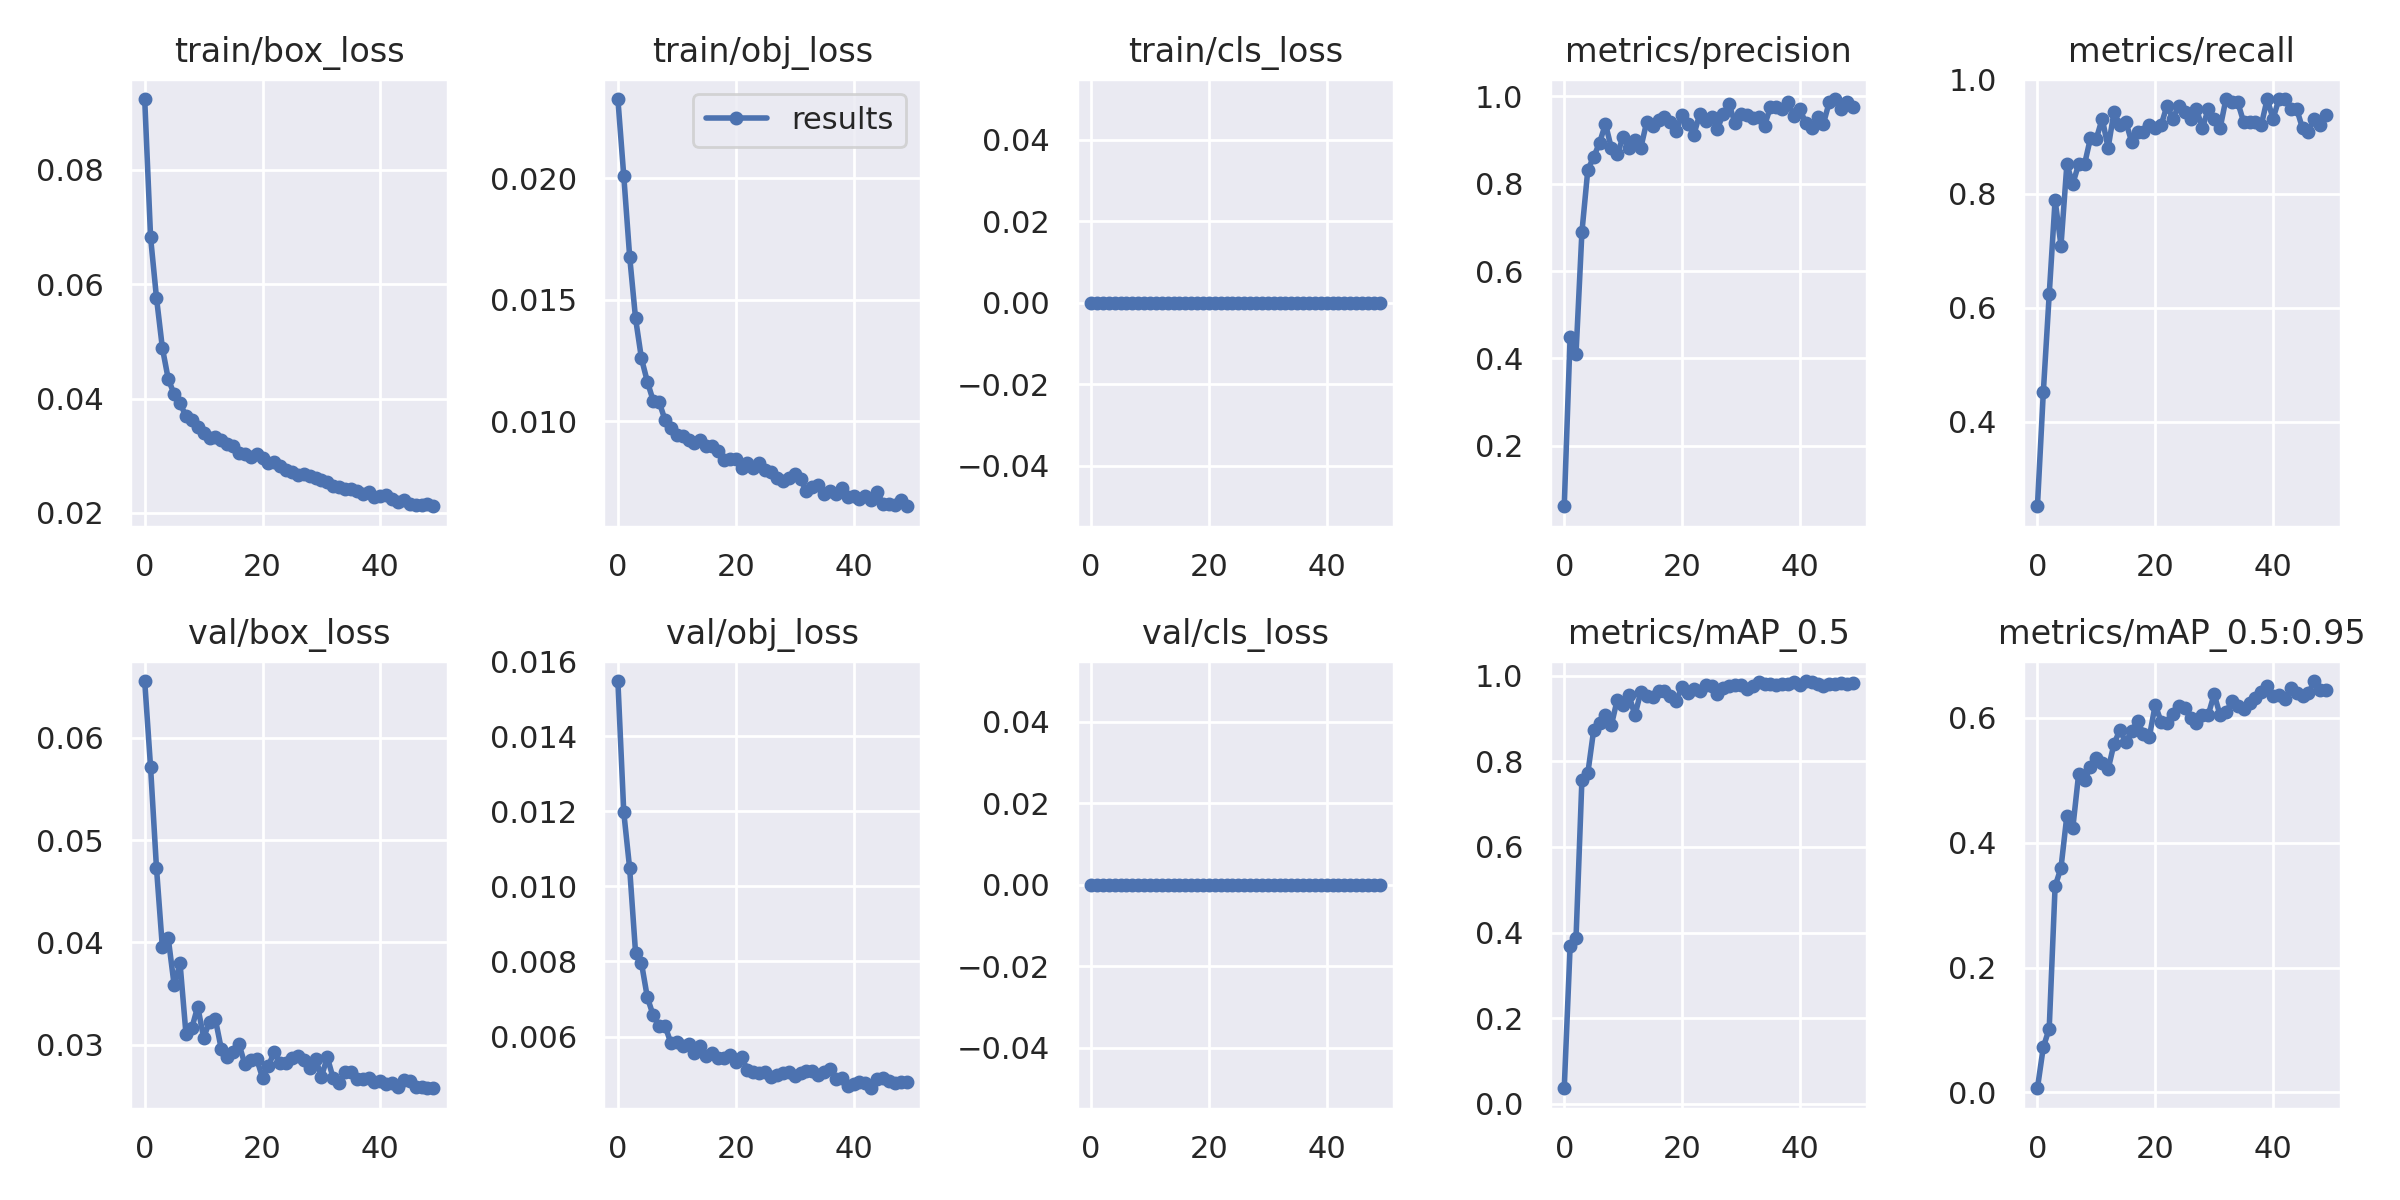

In [2]:
from google.colab.patches import cv2_imshow
import cv2

result_image=cv2.imread('/content/drive/MyDrive/final/output/results.png')
cv2_imshow(result_image)